# VacationPy
----

#### Note
* Keep an eye on your API usage. Use https://developers.google.com/maps/reporting/gmp-reporting as reference for how to monitor your usage and billing.

* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [21]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os

# Import API key
from api_keys import g_key

### Store Part I results into DataFrame
* Load the csv exported in Part I to a DataFrame

In [22]:
file = '../output/citiesComplete.csv'
df = pd.read_csv(file)
df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mataura,-46.1927,168.8643,55.99,79,100,13.00,NZ,1619581507
1,Saint-François,46.4154,3.9054,50.00,93,100,3.44,FR,1619581508
2,Barrow,71.2906,-156.7887,19.40,86,90,3.44,US,1619581508
3,Ampanihy,-24.7000,44.7500,70.38,67,0,5.55,MG,1619581508
4,Bambous Virieux,-20.3428,57.7575,75.20,94,75,18.41,MU,1619581509


### Humidity Heatmap
* Configure gmaps.
* Use the Lat and Lng as locations and Humidity as the weight.
* Add Heatmap layer to map.

In [28]:
gmaps.configure(api_key=g_key)
locations = df[["Lat", "Lng"]]
humidity = df["Humidity"].astype(float)

In [38]:
# Plot Heatmap
figure_layout = {
    'width': '1000px',
    'height': '800px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}

#Maps specifications. Added the center, Argelia lat and lng :) 
fig = gmaps.figure(layout=figure_layout, zoom_level=2, center=((28,2)))

# Create heat layer. Added max 100 for the Humidity highest value. 
heat_layer = gmaps.heatmap_layer(locations, weights=humidity, 
                                 dissipating=False, max_intensity=100, point_radius=4)


# Add layer
fig.add_layer(heat_layer)

# Display figure
fig

Figure(layout=FigureLayout(border='1px solid black', height='800px', margin='0 auto 0 auto', padding='1px', wi…

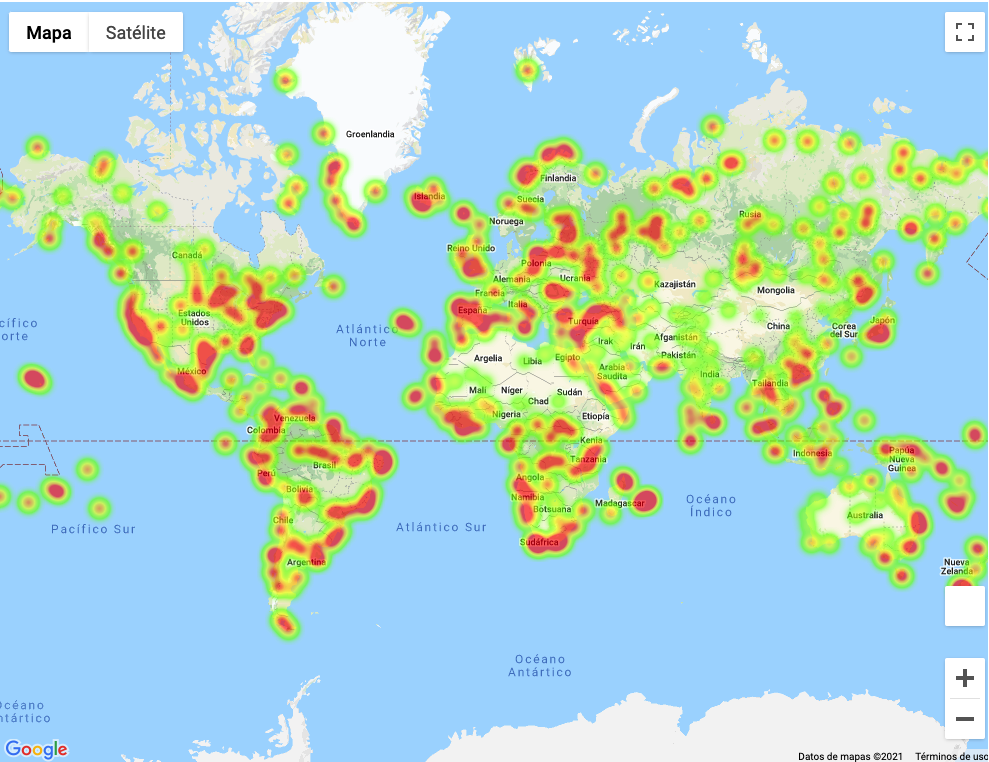


### Create new DataFrame fitting weather criteria
* Narrow down the cities to fit weather conditions.
* Drop any rows will null values.

### Hotel Map
* Store into variable named `hotel_df`.
* Add a "Hotel Name" column to the DataFrame.
* Set parameters to search for hotels with 5000 meters.
* Hit the Google Places API for each city's coordinates.
* Store the first Hotel result into the DataFrame.
* Plot markers on top of the heatmap.

In [ ]:
# NOTE: Do not change any of the code in this cell

# Using the template add the hotel marks to the heatmap
info_box_template = """
<dl>
<dt>Name</dt><dd>{Hotel Name}</dd>
<dt>City</dt><dd>{City}</dd>
<dt>Country</dt><dd>{Country}</dd>
</dl>
"""
# Store the DataFrame Row
# NOTE: be sure to update with your DataFrame name
hotel_info = [info_box_template.format(**row) for index, row in hotel_df.iterrows()]
locations = hotel_df[["Lat", "Lng"]]

In [ ]:
# Add marker layer ontop of heat map


# Display figure
